In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
import scipy.signal
%config InlineBackend.figure_format='retina'

In [2]:
def fftnoise(f):
    f = np.array(f, dtype='complex')
    Np = (len(f) - 1) // 2
    phases = np.random.rand(Np) * 2 * np.pi
    phases = np.cos(phases) + 1j * np.sin(phases)
    f[1:Np+1] *= phases
    f[-1:-1-Np:-1] = np.conj(f[1:Np+1])
    return np.fft.ifft(f).real

def band_limited_noise(min_freq, max_freq, samples=1024, samplerate=1):
    freqs = np.abs(np.fft.fftfreq(samples, 1/samplerate))
    f = np.zeros(samples)
    idx = np.where(np.logical_and(freqs>=min_freq, freqs<=max_freq))[0]
    f[idx] = 1
    return fftnoise(f)

In [47]:
# GHz-> kHz, 1e6
# MHz-> Hz
# From 20M-2G, Fs = 50GHz, 10ns = 500samples
# --> 20 - 2k Hz, 100 samples, Fs = 50k
Fs = 50_000
Nsamples = 500
x = band_limited_noise(0, 2000, Nsamples, Fs)* np.sqrt(Nsamples*Fs/2)

# Scale with gain
x = x*40*np.sqrt(1e6) *3
x = x/1e6 # turn from nV to mV

In [37]:
def get_noise():
    Fs = 50_000
    Nsamples = 500
    x = band_limited_noise(0, 2000, Nsamples, Fs)* np.sqrt(Nsamples*Fs/2)

    # Scale with gain
    x = x*40*np.sqrt(1e6) 
    x = x/1e6 # turn from nV to mV
    return x

In [48]:
time = np.linspace(0,Nsamples/Fs*1000, Nsamples)
slope = 8 # mV/ns
y = time*slope+x

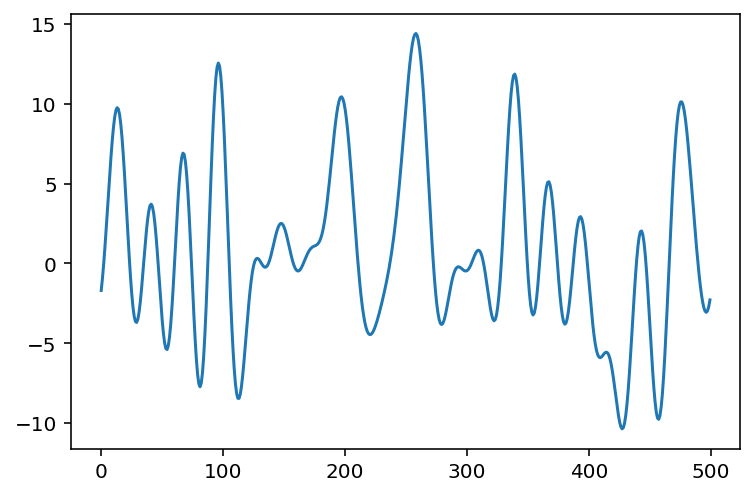

In [49]:
plot(x)
plot(time,y)

In [51]:
triggers=[]
for i in range(1000):
    x=get_noise()
    slope = 8 # mV/ns
    threshold=40
    y = time*slope+x 
    triggers.append(time[np.argmax(y>threshold)])
    

In [55]:
np.std(x)/8

0.22360679774997896

0.18035398673687644

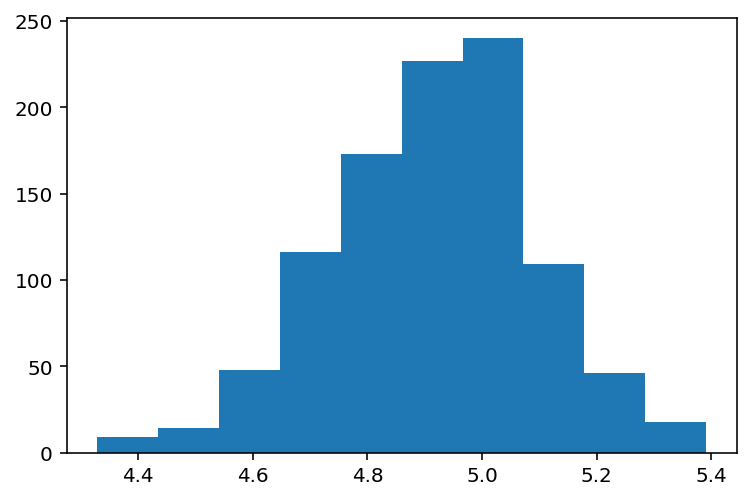

In [53]:
hist(triggers);
np.std(triggers)